In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import fipy
from fipy import Grid1D, CellVariable
from fipy import TransientTerm, DiffusionTerm

In [3]:
# define parameters
## physics
L = 1.0
Uinit = 0.0
U_H = 1.0
U_L = 0.0
alpha_left = 1.0
alpha_right = 0.2
## FVM
N = 100
dt = 0.001
Nt = 100

In [4]:
# define mesh
w = L/N
msh = Grid1D(dx=w, nx=N)

In [5]:
xcc = msh.cellCenters.value[0]

In [6]:
# define cell variables

In [7]:
alpha = CellVariable(mesh=msh)

In [8]:
alpha[xcc < L/2] = alpha_left
alpha[xcc >=L/2] = alpha_right

Text(0.5, 0, 'x')

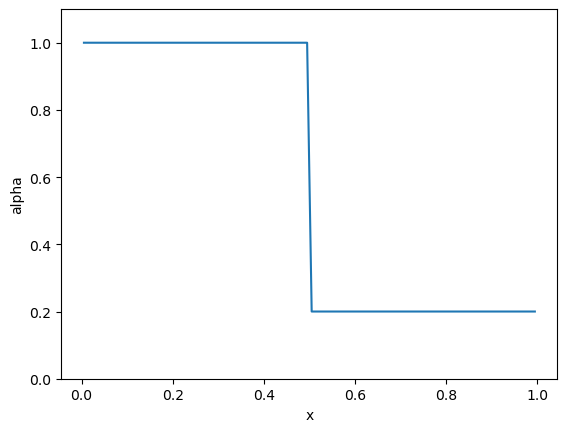

In [9]:
plt.plot(xcc, alpha.value)
plt.ylim(0,1.1)
plt.ylabel('alpha')
plt.xlabel('x')

In [10]:
u = CellVariable(mesh=msh, value=Uinit)

In [11]:
uval = u.value

In [12]:
# define BC
# default NO FLUX
u.constrain(value = U_H, where = msh.facesLeft)
u.constrain(value = U_L, where = msh.facesRight)

In [13]:
# define IC
uval[xcc < L/2] = U_H
uval[xcc >= L/2] = U_L

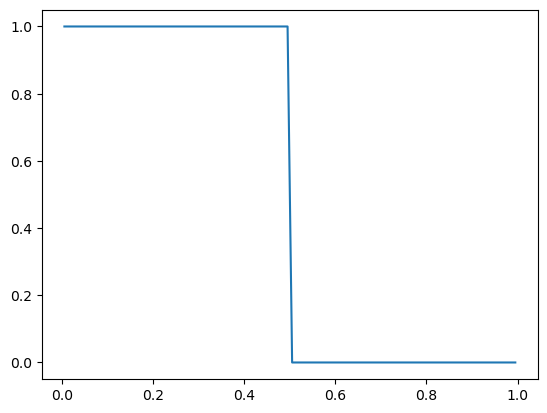

In [14]:
plt.plot(xcc, uval)

In [15]:
np.sum(uval * w)

0.5

In [16]:
# define PDE
eqn   = TransientTerm(var=u) == DiffusionTerm(var=u, coeff=alpha)

Text(0, 0.5, 'u')

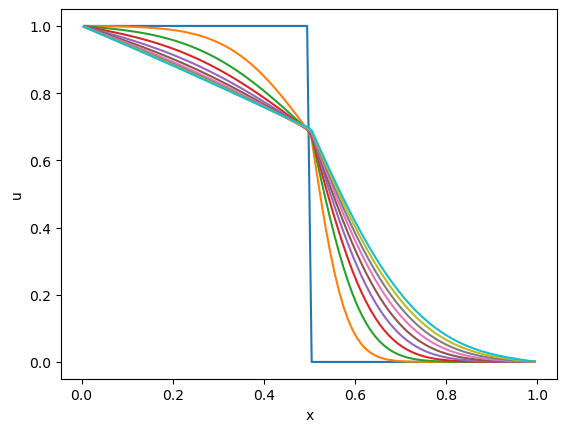

In [17]:
# solve equation, and sample solution
u0 = np.zeros(Nt)
tt = np.arange(Nt) * dt
for n in range(Nt):
    u0[n] = uval[0]
    if n%10==0:
        plt.plot(xcc, uval)
    eqn.solve(dt=dt)
plt.xlabel('x')
plt.ylabel('u')

In [18]:
np.sum(uval * w)

0.5360557601895075

Text(0.5, 0, 't')

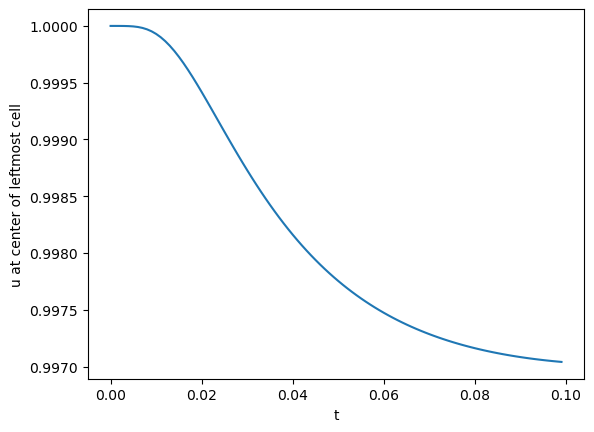

In [19]:
plt.plot(tt, u0)
plt.ylabel('u at center of leftmost cell')
plt.xlabel('t')